# Portugal Properties Price Prediction

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.getcwd()

'C:\\Users\\49176'

In [58]:
import warnings
warnings.filterwarnings("ignore")

In [59]:
# Reading File
df = pd.read_csv('portugal_proprieties_Beta.csv')
df.head()

,Location,Rooms,Price,Area,Bathrooms,Condition,AdsType,ProprietyType
0,"Espinho, Aveiro",3,1000.0,125.00,3.0,Used,Rent,Apartament
1,"Válega, Ovar, Aveiro",3,750.0,138.00,2.0,New,Rent,Apartament
2,"Gafanha da Nazaré, Ílhavo, Aveiro",1,450.0,32.80,2.0,New,Rent,Apartament
3,"Esmoriz, Ovar, Aveiro",3,1300.0,138.42,NaN,NaN,Rent,Apartament
4,"Esmoriz, Ovar, Aveiro",3,1300.0,129.51,3.0,Used,Rent,Apartament


In [60]:
# Splitting Strings
df['Location'].str.rsplit(',', expand=True, n=1)

,0,1
0,Espinho,Aveiro
1,"Válega, Ovar",Aveiro
2,"Gafanha da Nazaré, Ílhavo",Aveiro
3,"Esmoriz, Ovar",Aveiro
4,"Esmoriz, Ovar",Aveiro
...,...,...
144579,"Loivo, Vila Nova de Cerveira",Viana do Castelo
144580,"Caminha (Matriz) e Vilarelho, Caminha",Viana do Castelo
144581,"Caminha (Matriz) e Vilarelho, Caminha",Viana do Castelo
144582,Chafé,Viana do Castelo


In [61]:
# Splitting Strings
df[['City', 'District']] = df['Location'].str.rsplit(',', expand=True, n=1)

In [62]:
# Delete unnecessary Columns
df = df.drop(columns=['Location', 'City'])
df.head()

,Rooms,Price,Area,Bathrooms,Condition,AdsType,ProprietyType,District
0,3,1000.0,125.00,3.0,Used,Rent,Apartament,Aveiro
1,3,750.0,138.00,2.0,New,Rent,Apartament,Aveiro
2,1,450.0,32.80,2.0,New,Rent,Apartament,Aveiro
3,3,1300.0,138.42,NaN,NaN,Rent,Apartament,Aveiro
4,3,1300.0,129.51,3.0,Used,Rent,Apartament,Aveiro


In [63]:
df.District.unique()

array([' Aveiro', ' Beja', ' Braga', ' Bragança', ' Castelo Branco', None,
       ' Coimbra', ' Évora', ' Faro', ' Guarda', ' Ilha da Madeira',
       ' Ilha das Flores', ' Ilha de São Miguel', ' Ilha do Corvo',
       ' Ilha do Faial', ' Leiria', ' Lisboa', ' Portalegre', ' Porto',
       ' Santarém', ' Setúbal', ' Viana do Castelo', ' Vila Real',
       ' Viseu', ' Ilha da Graciosa', ' Ilha Terceira',
       ' Ilha de Porto Santo', ' Ilha de Santa Maria',
       ' Ilha de São Jorge', ' Ilha do Pico'], dtype=object)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144584 entries, 0 to 144583
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Rooms          144584 non-null  object 
 1   Price          142069 non-null  float64
 2   Area           144584 non-null  float64
 3   Bathrooms      122178 non-null  float64
 4   Condition      95481 non-null   object 
 5   AdsType        144584 non-null  object 
 6   ProprietyType  144584 non-null  object 
 7   District       143891 non-null  object 
dtypes: float64(3), object(5)
memory usage: 8.8+ MB


In [65]:
df['District'].value_counts()

 Porto                  33138
 Lisboa                 30636
 Setúbal                15045
 Faro                   14203
 Braga                  10668
 Aveiro                  9704
 Leiria                  5289
 Coimbra                 5079
 Santarém                4826
 Ilha da Madeira         3046
 Viana do Castelo        2843
 Viseu                   1494
 Castelo Branco          1423
 Beja                    1102
 Vila Real               1015
 Évora                    987
 Ilha de São Miguel       774
 Portalegre               747
 Guarda                   702
 Bragança                 558
 Ilha Terceira            327
 Ilha do Pico              72
 Ilha de Porto Santo       49
 Ilha do Faial             45
 Ilha de Santa Maria       45
 Ilha de São Jorge         35
 Ilha das Flores           22
 Ilha da Graciosa          14
 Ilha do Corvo              3
Name: District, dtype: int64

In [66]:
# Stripping spaces
df['District'] = df['District'].str.strip()
df['District'].value_counts()

Porto                  33138
Lisboa                 30636
Setúbal                15045
Faro                   14203
Braga                  10668
Aveiro                  9704
Leiria                  5289
Coimbra                 5079
Santarém                4826
Ilha da Madeira         3046
Viana do Castelo        2843
Viseu                   1494
Castelo Branco          1423
Beja                    1102
Vila Real               1015
Évora                    987
Ilha de São Miguel       774
Portalegre               747
Guarda                   702
Bragança                 558
Ilha Terceira            327
Ilha do Pico              72
Ilha de Porto Santo       49
Ilha do Faial             45
Ilha de Santa Maria       45
Ilha de São Jorge         35
Ilha das Flores           22
Ilha da Graciosa          14
Ilha do Corvo              3
Name: District, dtype: int64

In [67]:
df.isnull().sum()

Rooms                0
Price             2515
Area                 0
Bathrooms        22406
Condition        49103
AdsType              0
ProprietyType        0
District           693
dtype: int64

In [68]:
# Delete unnecessary 
df = df.dropna(subset=['Price'])

In [69]:
# Missing Values
df = df.fillna({'Condition':'Used'})
df = df.fillna({'Bathrooms':1})
df = df.dropna(subset=['District'])
df.isnull().sum()

Rooms            0
Price            0
Area             0
Bathrooms        0
Condition        0
AdsType          0
ProprietyType    0
District         0
dtype: int64

In [70]:
# Rename Columns
df = df.rename({'District':'Location'}, axis=1)
df.head()

,Rooms,Price,Area,Bathrooms,Condition,AdsType,ProprietyType,Location
0,3,1000.0,125.00,3.0,Used,Rent,Apartament,Aveiro
1,3,750.0,138.00,2.0,New,Rent,Apartament,Aveiro
2,1,450.0,32.80,2.0,New,Rent,Apartament,Aveiro
3,3,1300.0,138.42,1.0,Used,Rent,Apartament,Aveiro
4,3,1300.0,129.51,3.0,Used,Rent,Apartament,Aveiro


In [71]:
# Replacing Values
df['Location'].replace(['Ilha da Madeira', 'Ilha de São Miguel', 'Ilha Terceira', 'Ilha do Pico', 'Ilha de Porto Santo',
                        'Ilha do Faial', 'Ilha de Santa Maria', 'Ilha de São Jorge', 'Ilha das Flores', 'Ilha da Graciosa',
                       'Ilha do Corvo'], ['Ilha', 'Ilha', 'Ilha', 'Ilha', 'Ilha', 'Ilha', 'Ilha', 'Ilha', 'Ilha', 'Ilha',
                        'Ilha'], inplace=True)

In [72]:
df['Location'].value_counts()

Porto               32671
Lisboa              30225
Setúbal             14917
Faro                14001
Braga               10317
Aveiro               9622
Leiria               5133
Coimbra              4981
Santarém             4711
Ilha                 4249
Viana do Castelo     2722
Viseu                1466
Castelo Branco       1386
Beja                 1075
Vila Real             980
Évora                 967
Portalegre            738
Guarda                694
Bragança              547
Name: Location, dtype: int64

In [73]:
def long(x):
    if x == 'Porto':
        return 41.1579
    elif x == 'Lisboa':
        return 38.7223 
    elif x == 'Setúbal':
        return 38.5254
    elif x == 'Faro':
        return 37.0194
    elif x == 'Braga':
        return 41.5454
    elif x == 'Aveiro':
        return 40.6405
    elif x == 'Leiria':
        return 39.7495
    elif x == 'Coimbra':
        return 40.2033
    elif x == 'Santarém':
        return 39.2367
    elif x == 'Ilha':
        return 32.7607
    elif x == 'Viana do Castelo':
        return 41.6918
    elif x == 'Viseu':
        return 40.6588
    elif x == 'Castelo Branco':
        return 39.8196
    elif x == 'Beja':
        return 38.0153
    elif x == 'Vila Real':
        return 41.3010
    elif x == 'Évora':
        return 38.5714
    elif x == 'Portalegre':
        return 39.2967
    elif x == 'Guarda':
        return 40.5308
    elif x == 'Bragança':
        return 41.8061
    

In [74]:
# Adding Longitude
df['Longitude'] = df['Location'].apply(long)
df.head()

,Rooms,Price,Area,Bathrooms,Condition,AdsType,ProprietyType,Location,Longitude
0,3,1000.0,125.00,3.0,Used,Rent,Apartament,Aveiro,40.6405
1,3,750.0,138.00,2.0,New,Rent,Apartament,Aveiro,40.6405
2,1,450.0,32.80,2.0,New,Rent,Apartament,Aveiro,40.6405
3,3,1300.0,138.42,1.0,Used,Rent,Apartament,Aveiro,40.6405
4,3,1300.0,129.51,3.0,Used,Rent,Apartament,Aveiro,40.6405


In [75]:
def lat(x):
    if x == 'Porto':
        return 8.6291
    elif x == 'Lisboa':
        return 9.1393 
    elif x == 'Setúbal':
        return 8.8941
    elif x == 'Faro':
        return 7.9304
    elif x == 'Braga':
        return 8.4265
    elif x == 'Aveiro':
        return 8.6538
    elif x == 'Leiria':
        return 8.8077
    elif x == 'Coimbra':
        return 8.4103
    elif x == 'Santarém':
        return 8.6860
    elif x == 'Ilha':
        return 16.9595
    elif x == 'Viana do Castelo':
        return 8.8344
    elif x == 'Viseu':
        return 7.9148
    elif x == 'Castelo Branco':
        return 7.4965
    elif x == 'Beja':
        return 7.8627
    elif x == 'Vila Real':
        return 7.7422
    elif x == 'Évora':
        return 7.9135
    elif x == 'Portalegre':
        return 7.4285
    elif x == 'Guarda':
        return 7.2221
    elif x == 'Bragança':
        return 6.7567
    

In [76]:
# Adding Latitude
df['Latitude'] = df['Location'].apply(lat)
df.head()

,Rooms,Price,Area,Bathrooms,Condition,AdsType,ProprietyType,Location,Longitude,Latitude
0,3,1000.0,125.00,3.0,Used,Rent,Apartament,Aveiro,40.6405,8.6538
1,3,750.0,138.00,2.0,New,Rent,Apartament,Aveiro,40.6405,8.6538
2,1,450.0,32.80,2.0,New,Rent,Apartament,Aveiro,40.6405,8.6538
3,3,1300.0,138.42,1.0,Used,Rent,Apartament,Aveiro,40.6405,8.6538
4,3,1300.0,129.51,3.0,Used,Rent,Apartament,Aveiro,40.6405,8.6538


In [77]:
# Reorder Columns
new_columns = ['Location', 'Longitude', 'Latitude', 'Area', 'Rooms', 'Bathrooms', 'Price', 'Condition', 'ProprietyType', 'AdsType']
df = df[new_columns]
df.head()

,Location,Longitude,Latitude,Area,Rooms,Bathrooms,Price,Condition,ProprietyType,AdsType
0,Aveiro,40.6405,8.6538,125.00,3,3.0,1000.0,Used,Apartament,Rent
1,Aveiro,40.6405,8.6538,138.00,3,2.0,750.0,New,Apartament,Rent
2,Aveiro,40.6405,8.6538,32.80,1,2.0,450.0,New,Apartament,Rent
3,Aveiro,40.6405,8.6538,138.42,3,1.0,1300.0,Used,Apartament,Rent
4,Aveiro,40.6405,8.6538,129.51,3,3.0,1300.0,Used,Apartament,Rent


In [78]:
df['Longitude'].value_counts()

41.1579    32671
38.7223    30225
38.5254    14917
37.0194    14001
41.5454    10317
40.6405     9622
39.7495     5133
40.2033     4981
39.2367     4711
32.7607     4249
41.6918     2722
40.6588     1466
39.8196     1386
38.0153     1075
41.3010      980
38.5714      967
39.2967      738
40.5308      694
41.8061      547
Name: Longitude, dtype: int64

In [79]:
df['Latitude'].value_counts()

8.6291     32671
9.1393     30225
8.8941     14917
7.9304     14001
8.4265     10317
8.6538      9622
8.8077      5133
8.4103      4981
8.6860      4711
16.9595     4249
8.8344      2722
7.9148      1466
7.4965      1386
7.8627      1075
7.7422       980
7.9135       967
7.4285       738
7.2221       694
6.7567       547
Name: Latitude, dtype: int64

In [80]:
df['Rooms'].value_counts()

3                 50812
2                 38919
4                 22474
1                 13706
5                  6328
0                  4525
6                  2466
7                   894
10 ou superior      592
8                   460
9                   226
Name: Rooms, dtype: int64

In [81]:
df['Rooms'].replace(['1', '2', '3', '4', '5',
                        '6', '7', '8', '9', '10 ou superior'], ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], inplace=True)

In [82]:
df['Rooms'].value_counts()

3     50812
2     38919
4     22474
1     13706
5      6328
0      4525
6      2466
7       894
10      592
8       460
9       226
Name: Rooms, dtype: int64

In [83]:
df.head()

,Location,Longitude,Latitude,Area,Rooms,Bathrooms,Price,Condition,ProprietyType,AdsType
0,Aveiro,40.6405,8.6538,125.00,3,3.0,1000.0,Used,Apartament,Rent
1,Aveiro,40.6405,8.6538,138.00,3,2.0,750.0,New,Apartament,Rent
2,Aveiro,40.6405,8.6538,32.80,1,2.0,450.0,New,Apartament,Rent
3,Aveiro,40.6405,8.6538,138.42,3,1.0,1300.0,Used,Apartament,Rent
4,Aveiro,40.6405,8.6538,129.51,3,3.0,1300.0,Used,Apartament,Rent


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141402 entries, 0 to 144581
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       141402 non-null  object 
 1   Longitude      141402 non-null  float64
 2   Latitude       141402 non-null  float64
 3   Area           141402 non-null  float64
 4   Rooms          141402 non-null  object 
 5   Bathrooms      141402 non-null  float64
 6   Price          141402 non-null  float64
 7   Condition      141402 non-null  object 
 8   ProprietyType  141402 non-null  object 
 9   AdsType        141402 non-null  object 
dtypes: float64(5), object(5)
memory usage: 11.9+ MB


In [85]:
 df['Rooms'] = df['Rooms'].astype(int)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141402 entries, 0 to 144581
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       141402 non-null  object 
 1   Longitude      141402 non-null  float64
 2   Latitude       141402 non-null  float64
 3   Area           141402 non-null  float64
 4   Rooms          141402 non-null  int32  
 5   Bathrooms      141402 non-null  float64
 6   Price          141402 non-null  float64
 7   Condition      141402 non-null  object 
 8   ProprietyType  141402 non-null  object 
 9   AdsType        141402 non-null  object 
dtypes: float64(5), int32(1), object(4)
memory usage: 11.3+ MB


In [87]:
df = df.drop(columns='Condition')

# Outliers

In [88]:
max_area = df['Area'].quantile(0.998)
max_area

2743.108000000182

In [89]:
df[df['Area']>max_area]

,Location,Longitude,Latitude,Area,Rooms,Bathrooms,Price,ProprietyType,AdsType
1996,Faro,37.0194,7.9304,4058.0,3,2.0,1950.0,House,Rent
2103,Lisboa,38.7223,9.1393,5000.0,1,1.0,4500.0,House,Rent
2351,Setúbal,38.5254,8.8941,50680.0,0,1.0,1500.0,House,Rent
2389,Setúbal,38.5254,8.8941,6129510.0,3,4.0,1200.0,House,Rent
5415,Aveiro,40.6405,8.6538,6680.0,1,2.0,293750.0,Apartament,Sell
...,...,...,...,...,...,...,...,...,...
143552,Viseu,40.6588,7.9148,13576.0,3,1.0,110000.0,House,Sell
143653,Viseu,40.6588,7.9148,267740.0,3,3.0,163000.0,House,Sell
143790,Viseu,40.6588,7.9148,49000.0,0,1.0,18750.0,House,Sell
143799,Viseu,40.6588,7.9148,12345.0,4,3.0,29000.0,House,Sell


In [90]:
min_area = df['Area'].quantile(0.002)
min_area

20.0

In [91]:
df[df['Area']<min_area]

,Location,Longitude,Latitude,Area,Rooms,Bathrooms,Price,ProprietyType,AdsType
24,Aveiro,40.6405,8.6538,15.0,2,2.0,900.0,Apartament,Rent
72,Aveiro,40.6405,8.6538,1.0,1,1.0,640.0,Apartament,Rent
74,Aveiro,40.6405,8.6538,1.0,3,2.0,600.0,Apartament,Rent
199,Coimbra,40.2033,8.4103,1.0,2,1.0,750.0,Apartament,Rent
340,Faro,37.0194,7.9304,1.0,3,2.0,1000.0,Apartament,Rent
...,...,...,...,...,...,...,...,...,...
143557,Viseu,40.6588,7.9148,5.0,2,1.0,50000.0,House,Sell
143801,Viseu,40.6588,7.9148,1.0,3,2.0,235000.0,House,Sell
143828,Viseu,40.6588,7.9148,1.0,5,2.0,45000.0,House,Sell
143968,Viseu,40.6588,7.9148,5.0,3,1.0,7500.0,House,Sell


In [92]:
df = df[(df.Area<max_area) & (df.Area>min_area)]
df.shape

(140829, 9)

In [93]:
max_price = df['Price'].quantile(0.99)
max_price

2500000.0

In [94]:
df[df['Price']>max_price]

,Location,Longitude,Latitude,Area,Rooms,Bathrooms,Price,ProprietyType,AdsType
2153,Lisboa,38.7223,9.1393,455.0,5,4.0,3.995000e+06,House,Rent
15959,Évora,38.5714,7.9135,448.0,5,4.0,3.550000e+06,Apartament,Sell
16265,Faro,37.0194,7.9304,662.0,5,4.0,2.860000e+06,Apartament,Sell
16300,Faro,37.0194,7.9304,307.0,5,4.0,2.900000e+06,Apartament,Sell
16473,Faro,37.0194,7.9304,440.0,2,1.0,2.600000e+06,Apartament,Sell
...,...,...,...,...,...,...,...,...,...
141940,Viana do Castelo,41.6918,8.8344,166.0,4,3.0,1.111111e+10,House,Sell
141949,Vila Real,41.3010,7.7422,1603.0,10,4.0,2.900000e+06,House,Sell
142145,Vila Real,41.3010,7.7422,220.5,4,4.0,4.974093e+07,House,Sell
142146,Vila Real,41.3010,7.7422,220.5,4,4.0,4.124681e+07,House,Sell


In [95]:
min_price = df['Price'].quantile(0.01)
min_price

1150.0

In [96]:
df[df['Price']<min_price]

,Location,Longitude,Latitude,Area,Rooms,Bathrooms,Price,ProprietyType,AdsType
0,Aveiro,40.6405,8.6538,125.0,3,3.0,1000.0,Apartament,Rent
1,Aveiro,40.6405,8.6538,138.0,3,2.0,750.0,Apartament,Rent
2,Aveiro,40.6405,8.6538,32.8,1,2.0,450.0,Apartament,Rent
6,Aveiro,40.6405,8.6538,88.0,2,2.0,850.0,Apartament,Rent
7,Aveiro,40.6405,8.6538,90.0,2,2.0,625.0,Apartament,Rent
...,...,...,...,...,...,...,...,...,...
144572,Porto,41.1579,8.6291,120.0,3,4.0,994.0,House,Vacation
144575,Santarém,39.2367,8.6860,60.0,1,1.0,560.0,House,Vacation
144576,Setúbal,38.5254,8.8941,80.0,2,1.0,700.0,House,Vacation
144577,Viana do Castelo,41.6918,8.8344,120.0,3,2.0,906.0,House,Vacation


In [97]:
df = df[(df.Price<max_price) & (df.Price>min_price)]
df.shape

(137898, 9)

In [98]:
df[df['Rooms']<1]

,Location,Longitude,Latitude,Area,Rooms,Bathrooms,Price,ProprietyType,AdsType
206,Évora,38.5714,7.9135,540.00,0,1.0,2500.0,Apartament,Rent
363,Ilha,32.7607,16.9595,150.00,0,1.0,35000.0,Apartament,Rent
453,Lisboa,38.7223,9.1393,45.00,0,1.0,1400.0,Apartament,Rent
502,Lisboa,38.7223,9.1393,78.00,0,2.0,1700.0,Apartament,Rent
518,Lisboa,38.7223,9.1393,55.00,0,1.0,1500.0,Apartament,Rent
...,...,...,...,...,...,...,...,...,...
143999,Viseu,40.6588,7.9148,180.00,0,1.0,55555.0,House,Sell
144008,Viseu,40.6588,7.9148,200.00,0,1.0,29000.0,House,Sell
144030,Viseu,40.6588,7.9148,862.00,0,1.0,30000.0,House,Sell
144066,Faro,37.0194,7.9304,46.00,0,1.0,28092.0,Apartament,Vacation


In [99]:
df = df[df.Rooms>=1]
df.shape

(133591, 9)

# Regression Analysis

In [100]:
from sklearn.model_selection import train_test_split

x = df.drop(['Price'], axis=1)
y = df['Price']

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [102]:
tr_df = x_train.join(y_train)

In [103]:
tr_df

,Location,Longitude,Latitude,Area,Rooms,Bathrooms,ProprietyType,AdsType,Price
58741,Porto,41.1579,8.6291,104.00,3,2.0,Apartament,Sell,320000.0
56246,Porto,41.1579,8.6291,162.00,3,3.0,Apartament,Sell,590000.0
36816,Lisboa,38.7223,9.1393,40.00,1,1.0,Apartament,Sell,228000.0
29460,Lisboa,38.7223,9.1393,85.00,3,2.0,Apartament,Sell,169000.0
10713,Braga,41.5454,8.4265,161.00,3,2.0,Apartament,Sell,220000.0
...,...,...,...,...,...,...,...,...,...
76160,Setúbal,38.5254,8.8941,57.00,2,2.0,Apartament,Sell,145000.0
136257,Setúbal,38.5254,8.8941,103.00,3,1.0,House,Sell,280000.0
24476,Ilha,32.7607,16.9595,61.90,1,1.0,Apartament,Sell,265000.0
29296,Lisboa,38.7223,9.1393,70.00,3,2.0,Apartament,Sell,297500.0


array([[<Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Rooms'}>],
       [<Axes: title={'center': 'Bathrooms'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

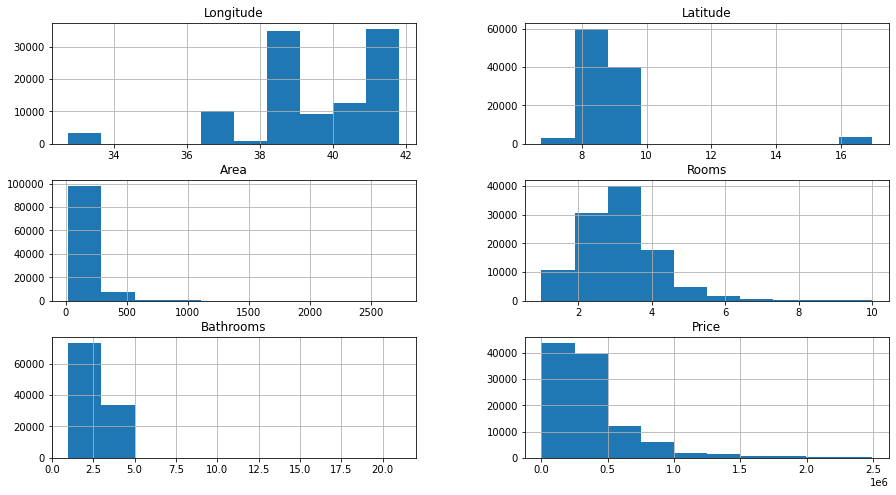

In [104]:
tr_df.hist(figsize=(15,8))

In [105]:
tr_df.corr()

,Longitude,Latitude,Area,Rooms,Bathrooms,Price
Longitude,1.000000,-0.621807,0.031085,0.011845,-0.014459,-0.162423
Latitude,-0.621807,1.000000,0.003480,-0.023410,0.017485,0.052970
Area,0.031085,0.003480,1.000000,0.543356,0.355298,0.353324
Rooms,0.011845,-0.023410,0.543356,1.000000,0.469450,0.346452
Bathrooms,-0.014459,0.017485,0.355298,0.469450,1.000000,0.453548
Price,-0.162423,0.052970,0.353324,0.346452,0.453548,1.000000


<Axes: >

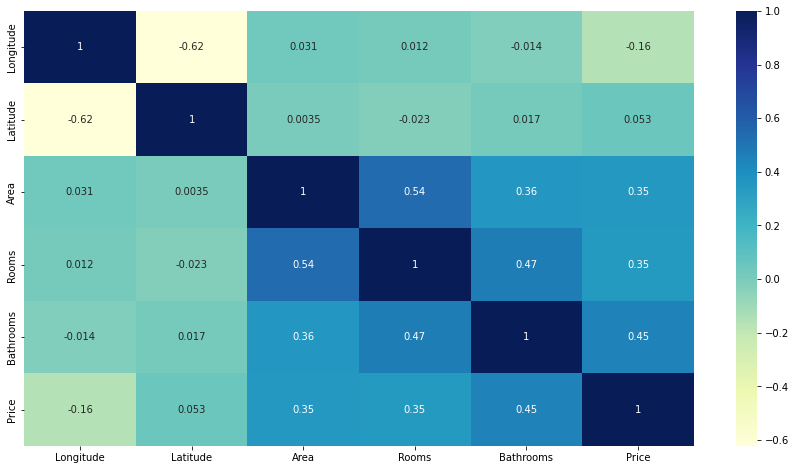

In [106]:
plt.figure(figsize=(15,8))
sns.heatmap(tr_df.corr(), annot=True, cmap='YlGnBu')

In [107]:
tr_df = pd.get_dummies(tr_df, columns=['Location', 'ProprietyType', 'AdsType'])
tr_df

,Longitude,Latitude,Area,Rooms,Bathrooms,Price,Location_Aveiro,Location_Beja,Location_Braga,Location_Bragança,...,Location_Setúbal,Location_Viana do Castelo,Location_Vila Real,Location_Viseu,Location_Évora,ProprietyType_Apartament,ProprietyType_House,AdsType_Rent,AdsType_Sell,AdsType_Vacation
58741,41.1579,8.6291,104.00,3,2.0,320000.0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
56246,41.1579,8.6291,162.00,3,3.0,590000.0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
36816,38.7223,9.1393,40.00,1,1.0,228000.0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
29460,38.7223,9.1393,85.00,3,2.0,169000.0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
10713,41.5454,8.4265,161.00,3,2.0,220000.0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76160,38.5254,8.8941,57.00,2,2.0,145000.0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
136257,38.5254,8.8941,103.00,3,1.0,280000.0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
24476,32.7607,16.9595,61.90,1,1.0,265000.0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
29296,38.7223,9.1393,70.00,3,2.0,297500.0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


<Axes: >

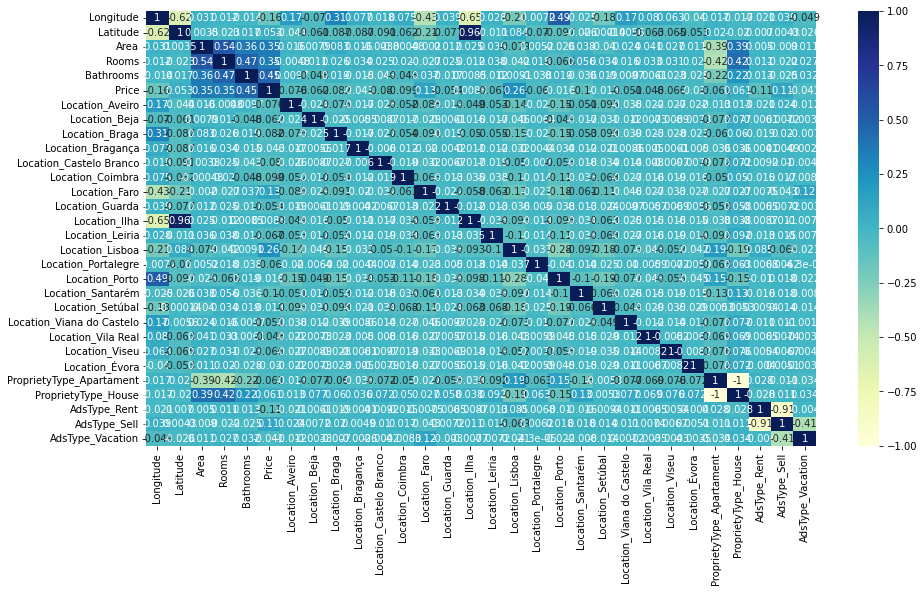

In [108]:
plt.figure(figsize=(15,8))
sns.heatmap(tr_df.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='Latitude', ylabel='Longitude'>

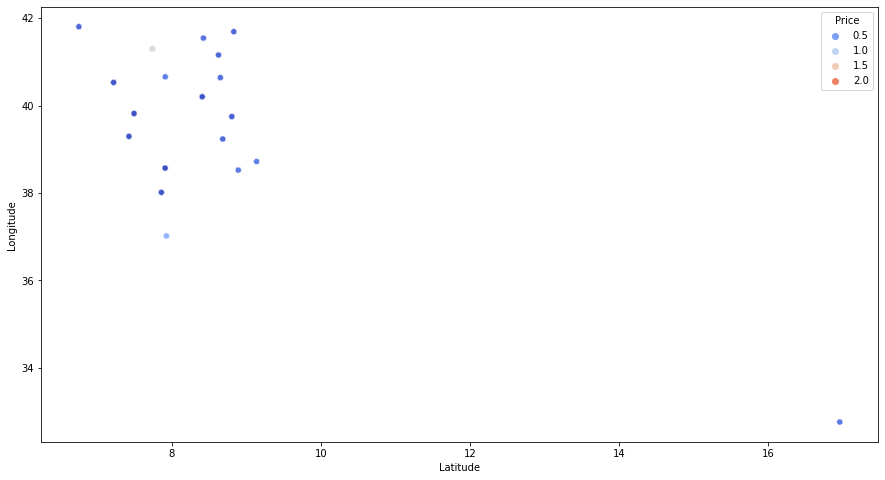

In [109]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Latitude', y='Longitude', data=tr_df, hue='Price', palette='coolwarm')

In [110]:
from sklearn.linear_model import LinearRegression

x_train, y_train = tr_df.drop(['Price'], axis=1), tr_df['Price']

reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [111]:
ts_df = x_test.join(y_test)

ts_df = pd.get_dummies(ts_df, columns=['Location', 'ProprietyType', 'AdsType'])
ts_df

,Longitude,Latitude,Area,Rooms,Bathrooms,Price,Location_Aveiro,Location_Beja,Location_Braga,Location_Bragança,...,Location_Setúbal,Location_Viana do Castelo,Location_Vila Real,Location_Viseu,Location_Évora,ProprietyType_Apartament,ProprietyType_House,AdsType_Rent,AdsType_Sell,AdsType_Vacation
126852,41.1579,8.6291,252.0,3,3.0,370000.0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
106811,40.5308,7.2221,326.0,6,4.0,175000.0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
105701,37.0194,7.9304,215.0,3,1.0,145000.0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
14360,40.2033,8.4103,55.5,1,1.0,168000.0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
13613,40.2033,8.4103,154.0,3,1.0,168500.0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72046,41.1579,8.6291,83.0,2,1.0,124000.0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
135917,38.5254,8.8941,195.6,5,4.0,430000.0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
102969,37.0194,7.9304,166.0,3,2.0,575000.0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
26192,39.7495,8.8077,115.0,3,2.0,168000.0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [112]:
x_test, y_test = ts_df.drop(['Price'], axis=1), ts_df['Price']

In [113]:
reg.score(x_test, y_test)

0.4209486424806831